# Dimensionality Reduction Techniques Comparison Using Digits Dataset


In this practical session, we will explore and compare three popular dimensionality reduction techniques: Principal Component Analysis (PCA), Linear Discriminant Analysis (LDA), and t-distributed Stochastic Neighbor Embedding (t-SNE). The dataset used in this comparison is the famous Digits dataset, which consists of images of handwritten digits. Through this exercise, students will gain an understanding of how each technique reduces dimensionality and the implications for visualizing high-dimensional data.

The notebook demonstrates three key methods:

PCA (unsupervised, variance maximisation)

LDA (supervised, class separability)

t-SNE (non-linear, local neighbourhood preservation)

1. **Importing Libraries and Dataset**
The first step involves importing the necessary libraries and loading the digits dataset.



In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from ipywidgets import interact, IntSlider, Button, HBox, VBox

2. **Load the Digits Dataset:**

digits = datasets.load_digits(): This line loads the dataset and stores it in the digits variable. The digits object is a Bunch object, which is similar to a dictionary.

X = digits.data: This line extracts the image data (pixel values) from the digits object and assigns it to the variable X. Each row in X represents a flattened 8x8 image (64 features).

y = digits.target: This line extracts the corresponding digit labels (0-9) for each image and assigns them to the variable y. This is the target variable we want to predict.

**Important:**
The datasets.load_digits() function from scikit-learn loads the dataset from a local copy that comes with the library, not directly from the internet each time it's called.

In [2]:
# Load the digits dataset
digits = datasets.load_digits()
X = digits.data
y = digits.target

The digit dataset, commonly used in machine learning, is part of the scikit-learn library and consists of 8x8 pixel images of handwritten digits (0 through 9). Each image is a grayscale representation, and each pixel is an integer value indicating the darkness of that pixel. The dataset contains 1,797 samples, with each digit represented by 8x8 pixels, resulting in a total of 64 features for each sample. The goal of using this dataset is often to train models to recognize and classify handwritten digits based on the pixel values, making it a popular choice for practicing classification algorithms in the context of image recognition and machine learning.

In [3]:
# Standardize the data
# fits a scaler on X and returns the standardised matrix X_std.
X_std = StandardScaler().fit_transform(X)


3. **Principal Component Analysis (PCA):**

In [4]:
# PCA
# pca = PCA(n_components=2) – creates a PCA object to project data onto two orthogonal axes capturing maximal variance.
# X_pca = pca.fit_transform(X_std) – fits PCA on the scaled data and returns the 2‑D embedding X_pca.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

4. **Linear Discriminant Analysis (LDA):**

In [5]:
# LDA
# lda = LDA(n_components=2) – initialises LDA to find two linear discriminants that maximise class separability.
# X_lda = lda.fit_transform(X_std, y) – fits LDA using both features and labels, yielding a 2‑D supervised projection.
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_std, y)

5. **t-distributed Stochastic Neighbor Embedding (t-SNE):**

Apply t-SNE to the dataset. t-SNE is effective for visualizing local patterns and clusters.

In [6]:
# t-SNE
# tsne = TSNE(n_components=2, random_state=42, perplexity=30) – sets up t‑SNE with two output dimensions, fixed seed for reproducibility, and a typical perplexity.
# X_tsne = tsne.fit_transform(X_std) – runs the non‑linear optimisation that maps high‑dimensional data into two dimensions (X_tsne).
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_std)

In [7]:
# Plotting results
# plt.figure(figsize=(18, 5)) – starts a wide figure accommodating three subplots.
plt.figure(figsize=(18, 6))

<Figure size 1800x600 with 0 Axes>

<Figure size 1800x600 with 0 Axes>

Text(0, 0.5, 'Principal Component 2')

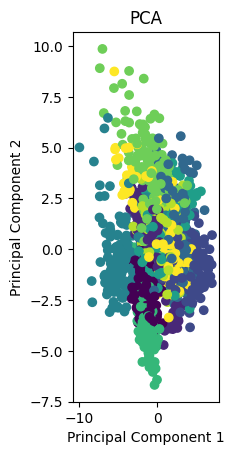

In [8]:
# PCA Plot
# plt.subplot(131) – selects the left‑most subplot (index 1 of 3).
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis') – draws the PCA embedding coloured by digit label.
# plt.title('PCA') – labels the subplot.
# plt.xlabel('Principal Component 1') – x‑axis descriptor.
# plt.ylabel('Principal Component 2') – y‑axis descriptor.
plt.subplot(131)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Text(0, 0.5, 'Linear Discriminant 2')

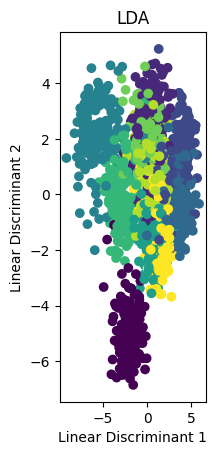

In [9]:
# LDA Plot
plt.subplot(132)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis')
plt.title('LDA')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')

Text(0, 0.5, 't-SNE Component 2')

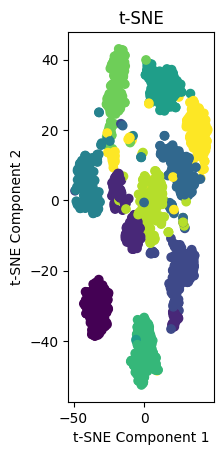

In [10]:
# t-SNE Plot
plt.subplot(133)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

**This code sets up an interactive interface where you can select different handwritten digit samples using a slider or a shuffle button, and then it displays the image, its true label, and the predicted label from the PCA, LDA, and t-SNE based classifiers.**

**classify(sample_idx=0) function:**

Takes an integer sample_idx as input, which is the index of the digit sample to display and classify.

img = digits.images[sample_idx]: Retrieves the 8x8 image data for the given sample index.

plt.figure(figsize=(2, 2)): Creates a small figure for displaying the image.

plt.imshow(img, cmap='gray_r'): Displays the image in grayscale.

plt.axis('off'): Hides the axes for a cleaner image display.

plt.title(f"True label: {y[sample_idx]}"): Sets the title of the plot to show the true label of the digit.

plt.show(): Displays the image plot.

for name, model in models.items():: Iterates through the dictionary models, which contains the trained k-Nearest Neighbors classifiers for each dimensionality reduction technique.

pred = model.predict([embeddings[name][sample_idx]])[0]: Predicts the digit label using the current model (model) on the corresponding embedded data point (embeddings[name][sample_idx]). The result is a list, so [0] extracts the single predicted value.

print(f"{name:5s} → predicted digit = {pred}"): Prints the name of the dimensionality reduction technique and its predicted digit.

**randomise(btn) function:**

This function is designed to be a callback for a button click.

idx_slider.value = np.random.randint(0, len(y)): Sets the value of the sample index slider (idx_slider) to a random integer between 0 and the total number of samples (len(y)), effectively selecting a random digit.

**Widget setup:**

idx_slider = IntSlider(...): Creates an integer slider widget.

value=0: Sets the initial value to 0.

min=0: Sets the minimum value to 0.

max=len(y)-1: Sets the maximum value to the last valid index of the dataset.

description="Sample:": Adds a label to the slider.

rand_btn = Button(...): Creates a button widget with the label "Shuffle".

rand_btn.on_click(randomise): Links the randomise function to the button's click event. When the button is clicked, the randomise function will be executed.

**Displaying widgets and interactivity:**

display(VBox([HBox([idx_slider, rand_btn])])): Arranges the slider and button horizontally (HBox) and then places them vertically (VBox) for display in the output.

interact(classify, sample_idx=idx_slider);: This is a powerful function from the ipywidgets library. It makes the classify function interactive.

The sample_idx argument of the classify function is linked to the idx_slider widget.
When the slider's value changes, the classify function is automatically called with the new slider value as the sample_idx.

In [11]:
embeddings = {
    "PCA":  PCA(n_components=2).fit_transform(X_std),
    "LDA":  LDA(n_components=2).fit_transform(X_std, y),
    "t‑SNE": TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_std)
}

models = { name: KNeighborsClassifier(3).fit(Z, y) for name, Z in embeddings.items() }

def classify(sample_idx=0):
    # Show the image
    img = digits.images[sample_idx]
    plt.figure(figsize=(2, 2))
    plt.imshow(img, cmap='gray_r')
    plt.axis('off')
    plt.title(f"True label: {y[sample_idx]}")
    plt.show()

    # Predict with each pipeline
    for name, model in models.items():
        pred = model.predict([embeddings[name][sample_idx]])[0]
        print(f"{name:5s} → predicted digit = {pred}")

# Extra button to pick a random sample
def randomise(btn):
    idx_slider.value = np.random.randint(0, len(y))

idx_slider = IntSlider(value=0, min=0, max=len(y)-1, description="Sample:")
rand_btn = Button(description="Shuffle")
rand_btn.on_click(randomise)

display(VBox([HBox([idx_slider, rand_btn])]))
interact(classify, sample_idx=idx_slider);

interactive(children=(IntSlider(value=0, description='Sample:', max=1796), Output()), _dom_classes=('widget-in…

**FOOTNOTE 1**


 Each dimensionality reduction technique has its own strengths and weaknesses, and the effectiveness of a method can vary depending on the nature of the dataset and the task at hand.

In the context of the digits dataset:

1. **PCA (Principal Component Analysis):** PCA is generally effective for capturing global structure and variability in the data. In the PCA plot, you'll likely see digits spread out based on overall patterns of pixel values. However, PCA might not perform well in preserving the local structure or class-specific information.

2. **LDA (Linear Discriminant Analysis):** LDA, being a supervised technique, aims to maximize the separation between classes. In the LDA plot, you may observe better separation between different digit classes. LDA is particularly useful when class information is available.

3. **t-SNE (t-distributed Stochastic Neighbor Embedding):** t-SNE is powerful for visualizing local patterns and clusters in the data. In the t-SNE plot, you may see distinct clusters corresponding to different digit classes. However, it's essential to note that t-SNE is computationally more expensive and may not preserve distances accurately.

The "best" method depends on your specific goals. If you are interested in global patterns and overall variability, PCA might be suitable. If you want to emphasize class separation, LDA could be a good choice. If you aim to capture local structures and clusters, t-SNE might be preferable.

It's often a good practice to try multiple methods and choose based on the insights each provides for your particular analysis or visualization task. Additionally, parameter tuning for each method (e.g., the number of components for PCA, the number of neighbors for t-SNE) can impact results, and experimenting with these parameters is recommended.

**In summary,** this Colab is a practical tool for understanding, comparing, and visualizing the impact of dimensionality reduction techniques on data, particularly for the task of handwritten digit recognition. It serves as an educational resource and a starting point for further experimentation in the field of machine learning.

In [12]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25, random_state=42)

# Re-run dimensionality reduction on training data and transform test data
embeddings_train = {
    "PCA":  PCA(n_components=2).fit_transform(X_train),
    "LDA":  LDA(n_components=2).fit_transform(X_train, y_train),
    "t‑SNE": TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_train)
}

# Transform test data using the models fitted on the training data
embeddings_test = {
    "PCA":  PCA(n_components=2).fit(X_train).transform(X_test),
    "LDA":  LDA(n_components=2).fit(X_train, y_train).transform(X_test),
    # t-SNE cannot directly transform new data, so we will refit on the combined data for comparison visualization
    # but for classification evaluation, we'll use the model trained on the embedded training data
    "t‑SNE": TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(np.vstack((X_train, X_test)))
}


# Train K-Nearest Neighbors classifiers on the embedded training data
models = { name: KNeighborsClassifier(3).fit(Z_train, y_train) for name, Z_train in embeddings_train.items() }

# Evaluate the accuracy of each classifier on the embedded test data
accuracies = {}
for name, model in models.items():
    # For t-SNE, we need to correctly map the test data points from the combined embedding
    if name == "t‑SNE":
        # Identify the test data points in the combined t-SNE embedding
        n_train_samples = embeddings_train[name].shape[0]
        Z_test_tsne = embeddings_test[name][n_train_samples:]
        y_pred = model.predict(Z_test_tsne)
    else:
        y_pred = model.predict(embeddings_test[name])

    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

print("Accuracy Comparison:")
for name, accuracy in accuracies.items():
    print(f"{name:5s}: {accuracy:.4f}")

# You can now use the `accuracies` dictionary to compare the performance of each method
# and choose the one with the highest accuracy for the classification task.

Accuracy Comparison:
PCA  : 0.5178
LDA  : 0.6467
t‑SNE: 0.9533
